In [1]:
# from tensorflow import Tensor
# from tensorflow.image import draw_bounding_boxes
import numpy as np, os

In [1]:
# from tensorflow.keras.utils import image_dataset_from_directory
from cv2 import rectangle, resize

In [2]:
from matplotlib.image import imsave, imread

In [1]:
from matplotlib.pyplot import subplots, close as fig_close, imshow, sca
# from gc import collect

In [2]:
# base dataset directory
# train_image_dir = '../data_centric_fpt/dataset/base/images/train'
# val_image_dir = '../data_centric_fpt/dataset/base/images/val'
# pub_test_image_dir = '../data_centric_fpt/dataset/base/images/public_test'
# -----------------

# augment applied result directory
# image_dir = {'train': 'image_aug/images/train',
#             'val': 'image_aug/images/val'}
            # 'public_test': '../data_centric_fpt/dataset/base/images/public_test'}

In [ ]:
train_set = image_dataset_from_directory(image_dir, labels=None,
                                         shuffle=False, batch_size=1, image_size=img_size)

Found 184 files belonging to 1 classes.


In [3]:
label_colors = [(255, 0, 0), (0, 255, 0), (255, 255, 0)]

In [3]:
# base dataset directory
# train_label_dir = 'labels/train'
# val_label_dir = 'labels/val'
# pub_test_label_dir = 'labels/public_test'
# -----------------

labels_dir = {'train': 'labels/train', 'val': 'labels/val'}#, 'public_test': 'labels/public_test'}

# Bounding box

In [11]:
# lb_dir = 'dataset/base/labels'
# img_dir = 'dataset/base/images'

img_save_dir = 'dataset/auto_augment/bounding_box'
lb_save_dir = 'dataset/auto_augment/labels'

img_dir = 'dataset/auto_augment/images'
lb_dir = 'dataset/auto_augment/labels'

# labels_files = get_aug_needed_images(lb_dir)
labels_files = os.listdir(lb_dir)

In [12]:
# for img_dir, lb_dir in zip(image_dir, labels_dir):
# for image_f, lb_f in zip(image_dir[img_dir], labels_dir[lb_dir]):
for fname in labels_files:
    # image_name = file[:file.find('.')]
    image_name = fname.replace("txt","jpg")
    # image = imread(f'{img_dir}/{image_name}_aa.jpg')
    # infos = np.loadtxt(f'{lb_dir}/{image_name}.txt', ndmin=2)
    image = imread(f'{img_dir}/{image_name}')
    infos = np.loadtxt(f'{lb_dir}/{fname}', ndmin=2)
    
    if not np.all(infos[:, 1:] > 1):
        continue
    else:
        infos[:, [1,3]] /= image.shape[1]
        infos[:, [2,4]] /= image.shape[0]

    for info in infos:
        info[[1,3]] *= image.shape[1]
        info[[2,4]] *= image.shape[0]
        
        top_left = np.around(np.abs(info[[1,2]] - info[[3,4]]/2)).astype(np.uint16, copy=False)
        bottom_right = np.around(np.abs(info[[1,2]] + info[[3,4]]/2)).astype(np.uint16, copy=False)

        image = rectangle(image, pt1=top_left, pt2=bottom_right,
                          color=label_colors[int(info[0])])
        
        info[[1,3]] /= image.shape[1]
        info[[2,4]] /= image.shape[0]
        
    imsave(f'{img_save_dir}/{image_name}',image)
    np.savetxt(f"{lb_save_dir}/{fname}", infos, fmt='%u %f %f %f %f')

In [13]:
# labels_bounding_box = []
for (image, file) in zip(train_set, label_files):
    img_info = np.loadtxt(f'{label_dir}/{file}')
    if img_info.size == 0: continue
    img_info = np.atleast_2d(img_info)
    
    labels, box = img_info[:, 0], img_info[:, 1:]
    
    box[:, [0, 2]] *= img_size[1]
    box[:, [1, 3]] *= img_size[0]
    
    box[:, 0] -= box[:, 2] / 2
    box[:, 1] -= box[:, 3] / 2
    
    box[:, 2] += box[:, 0]
    box[:, 3] += box[:, 1]
    
    box[:, [0, 2]] /= img_size[1]
    box[:, [1, 3]] /= img_size[0]

    box = box[:, [1,0,3,2]]
    
    colors = label_colors[labels.reshape(-1).astype(int)]
    
    bb_img = draw_bounding_boxes(image, box.reshape((1, *box.shape)), colors=colors)
    end_id = file.find('.')
    imsave(f'{save_dir}/{file[:end_id]}.jpg', np.array(bb_img[0], dtype=np.uint8, copy=False))
    
    # if file == '450.txt':
    #     break
    collect()
    

/tmp/ipykernel_11202/3716389529.py:3: UserWarning: loadtxt: Empty input file: "dataset/base/labels/val/853.txt"
  img_info = np.loadtxt(f'{label_dir}/{file}')


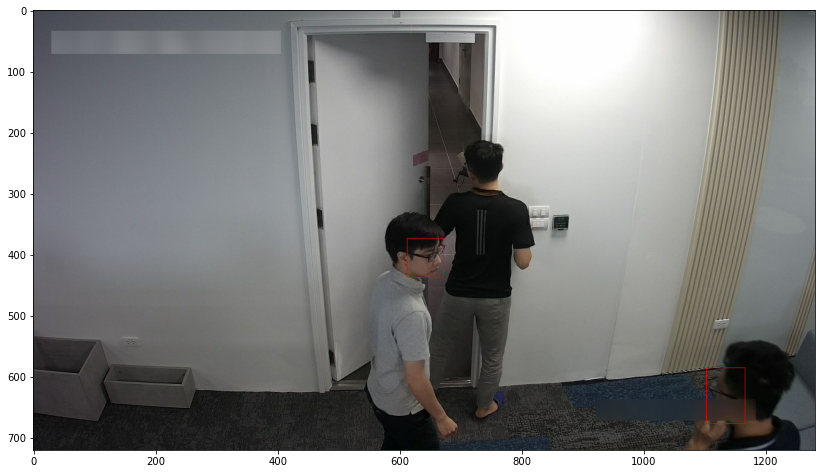

In [11]:
plt.subplots(figsize=(14, 10))
plt.imshow((bb_img[0].numpy().astype(int)))

Gán nhãn lại

In [2]:
import pandas as pd

In [3]:
relabel_df = pd.read_csv('dataset/auto_augment/relabel/vott-csv-export/datacomo_autoaugment-export.csv')
relabel_df

,image,xmin,ymin,xmax,ymax,label
0,1000_aa.jpg,405.525146,101.615260,453.426052,138.664009,no_mask
1,1002_aa.jpg,1502.442900,468.127208,1599.113898,593.598801,mask_incorrect
2,1002_aa.jpg,2299.197997,2.568607,2336.353223,47.580855,mask
3,1002_crop0_aa.jpg,358.450844,420.093798,446.581605,536.538511,mask_incorrect
4,1003_aa.jpg,103.384027,307.563207,159.116943,363.339242,mask_incorrect
...,...,...,...,...,...,...
987,988_crop0_aa.jpg,43.853029,274.770318,89.612711,317.195528,no_mask
988,988_crop0_aa.jpg,439.378152,234.510055,487.777869,289.307569,mask
989,991_aa.jpg,627.469297,333.004903,700.802061,404.437349,mask_incorrect
990,991_crop0_aa.jpg,195.913227,60.332294,247.246200,115.619059,mask_incorrect


In [4]:
relabel_df.dtypes

image     object
xmin     float64
ymin     float64
xmax     float64
ymax     float64
label     object
dtype: object

In [4]:
relabel_df.label = relabel_df.label.replace({'no_mask': 0, 'mask': 1, 'mask_incorrect': 2})
relabel_df

,image,xmin,ymin,xmax,ymax,label
0,1000_aa.jpg,405.525146,101.615260,453.426052,138.664009,0
1,1002_aa.jpg,1502.442900,468.127208,1599.113898,593.598801,2
2,1002_aa.jpg,2299.197997,2.568607,2336.353223,47.580855,1
3,1002_crop0_aa.jpg,358.450844,420.093798,446.581605,536.538511,2
4,1003_aa.jpg,103.384027,307.563207,159.116943,363.339242,2
...,...,...,...,...,...,...
987,988_crop0_aa.jpg,43.853029,274.770318,89.612711,317.195528,0
988,988_crop0_aa.jpg,439.378152,234.510055,487.777869,289.307569,1
989,991_aa.jpg,627.469297,333.004903,700.802061,404.437349,2
990,991_crop0_aa.jpg,195.913227,60.332294,247.246200,115.619059,2


In [5]:
relabel_df['width'] = relabel_df.xmax - relabel_df.xmin
relabel_df['height'] = relabel_df.ymax - relabel_df.ymin
relabel_df

,image,xmin,ymin,xmax,ymax,label,width,height
0,1000_aa.jpg,405.525146,101.615260,453.426052,138.664009,0,47.900906,37.048749
1,1002_aa.jpg,1502.442900,468.127208,1599.113898,593.598801,2,96.670998,125.471593
2,1002_aa.jpg,2299.197997,2.568607,2336.353223,47.580855,1,37.155226,45.012248
3,1002_crop0_aa.jpg,358.450844,420.093798,446.581605,536.538511,2,88.130760,116.444713
4,1003_aa.jpg,103.384027,307.563207,159.116943,363.339242,2,55.732916,55.776035
...,...,...,...,...,...,...,...,...
987,988_crop0_aa.jpg,43.853029,274.770318,89.612711,317.195528,0,45.759682,42.425210
988,988_crop0_aa.jpg,439.378152,234.510055,487.777869,289.307569,1,48.399718,54.797514
989,991_aa.jpg,627.469297,333.004903,700.802061,404.437349,2,73.332764,71.432446
990,991_crop0_aa.jpg,195.913227,60.332294,247.246200,115.619059,2,51.332974,55.286765


In [6]:
relabel_df['x_center'] = relabel_df.xmin + relabel_df['width'] / 2
relabel_df['y_center'] = relabel_df.ymin + relabel_df['height'] / 2
relabel_df

,image,xmin,ymin,xmax,ymax,label,width,height,x_center,y_center
0,1000_aa.jpg,405.525146,101.615260,453.426052,138.664009,0,47.900906,37.048749,429.475599,120.139634
1,1002_aa.jpg,1502.442900,468.127208,1599.113898,593.598801,2,96.670998,125.471593,1550.778399,530.863005
2,1002_aa.jpg,2299.197997,2.568607,2336.353223,47.580855,1,37.155226,45.012248,2317.775610,25.074731
3,1002_crop0_aa.jpg,358.450844,420.093798,446.581605,536.538511,2,88.130760,116.444713,402.516224,478.316154
4,1003_aa.jpg,103.384027,307.563207,159.116943,363.339242,2,55.732916,55.776035,131.250485,335.451224
...,...,...,...,...,...,...,...,...,...,...
987,988_crop0_aa.jpg,43.853029,274.770318,89.612711,317.195528,0,45.759682,42.425210,66.732870,295.982923
988,988_crop0_aa.jpg,439.378152,234.510055,487.777869,289.307569,1,48.399718,54.797514,463.578011,261.908812
989,991_aa.jpg,627.469297,333.004903,700.802061,404.437349,2,73.332764,71.432446,664.135679,368.721126
990,991_crop0_aa.jpg,195.913227,60.332294,247.246200,115.619059,2,51.332974,55.286765,221.579713,87.975677


In [9]:
def get_image_shape(fname, folder='.', opencv_fmt=True):
    image = imread(f'{folder}/{fname}')
    if opencv_fmt:
        return tuple(reversed(image.shape[:2]))
    else:
        return image.shape

In [8]:
relabel_df['shape'] = relabel_df.image.apply(get_image_shape, args=('dataset/auto_augment/images',))
relabel_df

,image,xmin,ymin,xmax,ymax,label,width,height,x_center,y_center,shape
0,1000_aa.jpg,405.525146,101.615260,453.426052,138.664009,0,47.900906,37.048749,429.475599,120.139634,"(812, 585)"
1,1002_aa.jpg,1502.442900,468.127208,1599.113898,593.598801,2,96.670998,125.471593,1550.778399,530.863005,"(2560, 1440)"
2,1002_aa.jpg,2299.197997,2.568607,2336.353223,47.580855,1,37.155226,45.012248,2317.775610,25.074731,"(2560, 1440)"
3,1002_crop0_aa.jpg,358.450844,420.093798,446.581605,536.538511,2,88.130760,116.444713,402.516224,478.316154,"(1280, 720)"
4,1003_aa.jpg,103.384027,307.563207,159.116943,363.339242,2,55.732916,55.776035,131.250485,335.451224,"(1280, 720)"
...,...,...,...,...,...,...,...,...,...,...,...
987,988_crop0_aa.jpg,43.853029,274.770318,89.612711,317.195528,0,45.759682,42.425210,66.732870,295.982923,"(640, 360)"
988,988_crop0_aa.jpg,439.378152,234.510055,487.777869,289.307569,1,48.399718,54.797514,463.578011,261.908812,"(640, 360)"
989,991_aa.jpg,627.469297,333.004903,700.802061,404.437349,2,73.332764,71.432446,664.135679,368.721126,"(1280, 720)"
990,991_crop0_aa.jpg,195.913227,60.332294,247.246200,115.619059,2,51.332974,55.286765,221.579713,87.975677,"(640, 360)"


In [9]:
# relabel_df[['x_center','width']] 
relabel_df['shape_0'] = relabel_df['shape'].apply(lambda x: x[0])
relabel_df['shape_1'] = relabel_df['shape'].apply(lambda x: x[1])
relabel_df

,image,xmin,ymin,xmax,ymax,label,width,height,x_center,y_center,shape,shape_0,shape_1
0,1000_aa.jpg,405.525146,101.615260,453.426052,138.664009,0,47.900906,37.048749,429.475599,120.139634,"(812, 585)",812,585
1,1002_aa.jpg,1502.442900,468.127208,1599.113898,593.598801,2,96.670998,125.471593,1550.778399,530.863005,"(2560, 1440)",2560,1440
2,1002_aa.jpg,2299.197997,2.568607,2336.353223,47.580855,1,37.155226,45.012248,2317.775610,25.074731,"(2560, 1440)",2560,1440
3,1002_crop0_aa.jpg,358.450844,420.093798,446.581605,536.538511,2,88.130760,116.444713,402.516224,478.316154,"(1280, 720)",1280,720
4,1003_aa.jpg,103.384027,307.563207,159.116943,363.339242,2,55.732916,55.776035,131.250485,335.451224,"(1280, 720)",1280,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,988_crop0_aa.jpg,43.853029,274.770318,89.612711,317.195528,0,45.759682,42.425210,66.732870,295.982923,"(640, 360)",640,360
988,988_crop0_aa.jpg,439.378152,234.510055,487.777869,289.307569,1,48.399718,54.797514,463.578011,261.908812,"(640, 360)",640,360
989,991_aa.jpg,627.469297,333.004903,700.802061,404.437349,2,73.332764,71.432446,664.135679,368.721126,"(1280, 720)",1280,720
990,991_crop0_aa.jpg,195.913227,60.332294,247.246200,115.619059,2,51.332974,55.286765,221.579713,87.975677,"(640, 360)",640,360


In [10]:
relabel_df['x_center'] /= relabel_df['shape_0']
relabel_df['width'] /= relabel_df['shape_0']
relabel_df['y_center'] /= relabel_df['shape_1']
relabel_df['height'] /= relabel_df['shape_1']
# relabel_df[['y_center','height']] /= relabel_df['shape_0']
relabel_df

,image,xmin,ymin,xmax,ymax,label,width,height,x_center,y_center,shape,shape_0,shape_1
0,1000_aa.jpg,405.525146,101.615260,453.426052,138.664009,0,0.058991,0.063331,0.528911,0.205367,"(812, 585)",812,585
1,1002_aa.jpg,1502.442900,468.127208,1599.113898,593.598801,2,0.037762,0.087133,0.605773,0.368655,"(2560, 1440)",2560,1440
2,1002_aa.jpg,2299.197997,2.568607,2336.353223,47.580855,1,0.014514,0.031259,0.905381,0.017413,"(2560, 1440)",2560,1440
3,1002_crop0_aa.jpg,358.450844,420.093798,446.581605,536.538511,2,0.068852,0.161729,0.314466,0.664328,"(1280, 720)",1280,720
4,1003_aa.jpg,103.384027,307.563207,159.116943,363.339242,2,0.043541,0.077467,0.102539,0.465904,"(1280, 720)",1280,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,988_crop0_aa.jpg,43.853029,274.770318,89.612711,317.195528,0,0.071500,0.117848,0.104270,0.822175,"(640, 360)",640,360
988,988_crop0_aa.jpg,439.378152,234.510055,487.777869,289.307569,1,0.075625,0.152215,0.724341,0.727524,"(640, 360)",640,360
989,991_aa.jpg,627.469297,333.004903,700.802061,404.437349,2,0.057291,0.099212,0.518856,0.512113,"(1280, 720)",1280,720
990,991_crop0_aa.jpg,195.913227,60.332294,247.246200,115.619059,2,0.080208,0.153574,0.346218,0.244377,"(640, 360)",640,360


In [12]:
write_df = relabel_df[['image','label','x_center','y_center','width','height']]
write_df

,image,label,x_center,y_center,width,height
0,1000_aa.jpg,0,0.528911,0.205367,0.058991,0.063331
1,1002_aa.jpg,2,0.605773,0.368655,0.037762,0.087133
2,1002_aa.jpg,1,0.905381,0.017413,0.014514,0.031259
3,1002_crop0_aa.jpg,2,0.314466,0.664328,0.068852,0.161729
4,1003_aa.jpg,2,0.102539,0.465904,0.043541,0.077467
...,...,...,...,...,...,...
987,988_crop0_aa.jpg,0,0.104270,0.822175,0.071500,0.117848
988,988_crop0_aa.jpg,1,0.724341,0.727524,0.075625,0.152215
989,991_aa.jpg,2,0.518856,0.512113,0.057291,0.099212
990,991_crop0_aa.jpg,2,0.346218,0.244377,0.080208,0.153574


In [15]:
for fname, data in write_df.groupby('image'):
    data.iloc[:,1:].to_csv(f'dataset/auto_augment/relabel/{fname.replace("jpg","txt")}',
               sep=' ',header=False, index=False)

# Tìm hình có đối tượng lớp 0 và 2

In [15]:
def get_aug_needed_images(folder):
    '''
    Hàm tìm những hình có đối tượng thuộc lớp khác 1 từ những tập nhãn.
    Giả định tên tập nhãn giống với tên tập tin hình.
    
    Đầu vào:
    --------
    folder: str
        đường dẫn tới tập nhãn của những bức hình cần tìm.
            
    Đầu ra:
    --------
    label_files: list
        danh sách những hình có đối tượng thuộc lớp khác 1.
    '''
    label_files = !ls {folder}
    rm_files = []
    
    for file in label_files:
        image_info = np.loadtxt(f'{folder}/{file}',ndmin=2)        
        if image_info.size == 0: 
            rm_files.append(file)
            continue
            
        # image_info = np.atleast_2d(image_info)        
        labels = image_info[:, 0]
        
        diff_label_one = np.where(labels == 2)[0]
        if diff_label_one.size == 0:
            rm_files.append(file)
            
    for file in rm_files:
        label_files.remove(file)
        
    return label_files

In [5]:
# train_labels_files = get_aug_needed_images(labels_dir['train'])
# val_labels_files = get_aug_needed_images(labels_dir['val'])
labels_files = {'train': get_aug_needed_images(labels_dir['train']),
               'val': get_aug_needed_images(labels_dir['val'])}
               # 'public_test': get_aug_needed_images(labels_dir['public_test'])}

In [6]:
list(map(len, labels_files.values()))

[1329, 352]

# Crop.

In [3]:
def image_crop(image, info):
    labels = info[:, 0] # truy xuất các nhãn của các đối tượng.
    crop_labels_ids = np.where(labels == 2)[0] # tìm chỉ mục những nhãn != 1
    # lấy kích thước ban đầu của hình, định dạng (rộng, cao)
    img_size = np.array([image.shape[1], image.shape[0]], copy=False)
    
    for label_id in crop_labels_ids:
        # tính tâm điểm và độ rộng, cao của đối tượng cần cắt
        # theo số điểm ảnh với kích thước ban đầu
        center_point = info[label_id,[1,2]] * img_size
        box_size = info[label_id,[3,4]] * img_size
        
        d_center = img_size / 4
        ratio = np.random.uniform(-0.8, 0.9, 2)
        d_shift = d_center * ratio
        
        top_left = center_point - d_center + d_shift
        bottom_right = center_point + d_center + d_shift
        
        complement = 0
        if top_left[0] < 0:
            complement = -top_left[0]
            top_left[0] = 0
            bottom_right[0] += complement
        elif bottom_right[0] > image.shape[1]:
            complement = bottom_right[0] - image.shape[1]
            bottom_right[0] = image.shape[1]
            top_left[0] -= complement
            
        if top_left[1] < 0:
            complement = -top_left[1]
            top_left[1] = 0
            bottom_right[1] += complement
        elif bottom_right[1] > image.shape[0]:
            complement = bottom_right[1] - image.shape[0]
            bottom_right[1] = image.shape[0]
            top_left[1] -= complement
            
        
        new_img_size = bottom_right - top_left
        new_center = (center_point - top_left) / new_img_size
        new_box_percentage = box_size / new_img_size
        
        new_info = [np.concatenate(([info[label_id, 0]], new_center, new_box_percentage))]
        
        for i in range(labels.size):
            if i == label_id:
                continue
                
            center_i = info[i, [1,2]] * img_size
            if np.all(top_left <= center_i) and np.all(center_i <= bottom_right):
                box_size = info[i,[3,4]] * img_size
                new_center = (center_i - top_left) / new_img_size
                new_box_percentage = box_size / new_img_size
                new_info.append(np.concatenate(([info[i, 0]], new_center, new_box_percentage)))
        
        top_left = top_left.round().astype(np.uint16)
        bottom_right = bottom_right.round().astype(np.uint16)
        yield image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]], new_info

In [ ]:
#kiểm tra cài đặt
image = imread(f'{image_dir["train"]}/68.jpg')
info = np.loadtxt(f'{train_label_dir}/68.txt')

fig, axes = subplots(ncols=2, figsize=(16,9))
for i, (crop_image, new_labels) in enumerate(image_crop(image, info)):
    sca(axes[i])
    # crop_image = draw_bounding_boxes()
    imshow(crop_image)
    # imshow(rectangle(crop_image, pt1=new_labels[1:3], pt2=new_labels[3:],
    #                  color=(255,255,0)))
    print(new_labels)

In [17]:
# for directory in labels_files:
# for file in labels_files[directory]:
lb_dir, lb_save_dir = 'dataset/base/labels', 'dataset/crop/labels/'
img_dir, img_save_dir = 'dataset/base/images', 'dataset/crop/images/'
labels_files = get_aug_needed_images(lb_dir)

/tmp/ipykernel_4533/3667276926.py:20: UserWarning: loadtxt: Empty input file: "dataset/base/labels/853.txt"
  image_info = np.loadtxt(f'{dir}/{file}',ndmin=2)


In [18]:
for file in labels_files:
    # if np.random.uniform() < 0.6:
    #     continue

    image_name = file[:file.find('.')]
    # image = imread(f'{image_dir[directory]}/{image_name}.jpg')
    # info = np.loadtxt(f'{labels_dir[directory]}/{file}', ndmin=2)
    
    image = imread(f'{img_dir}/{image_name}.jpg')
    info = np.loadtxt(f'{lb_dir}/{file}', ndmin=2)

    for i, (crop_image, new_labels) in enumerate(image_crop(image, info)):
        imsave(f'{img_save_dir}/{image_name}_crop{i}.jpg', crop_image)
        np.savetxt(f'{lb_save_dir}/{image_name}_crop{i}.txt', new_labels,
                  fmt='%u %f %f %f %f')

# Additive Gaussian Noise

In [5]:
# train_labels_files = get_aug_needed_images(labels_dir['train'])
# val_labels_files = get_aug_needed_images(labels_dir['val'])
labels_files = {'train': get_aug_needed_images(labels_dir['train']),
               'val': get_aug_needed_images(labels_dir['val'])}
               # 'public_test': get_aug_needed_images(labels_dir['public_test'])}

In [13]:
for directory in labels_files:
    for file in labels_files[directory]:
        image_name = file[:file.find('.')]
        image = imread(f'{image_dir[directory]}/{image_name}.jpg')
        info = np.loadtxt(f'{labels_dir[directory]}/{file}', ndmin=2)

        noise_prob = np.random.random()
        if noise_prob >= 0.85:
            noise = np.random.normal(size=image.shape)
            image = image.astype(np.float16, copy=False) + noise
            image = np.clip(image, 0, 255).astype(np.uint8, copy=False)
            
            imsave(f'{image_dir[directory]}/{image_name}_noise{i}.jpg', image)
            np.savetxt(f'{labels_dir[directory]}/{image_name}_noise{i}.txt', info,
                      fmt='%u %f %f %f %f')

In [24]:
# Xóa ngẫu nhiên 1 số hình dư đến khi tập dữ liệu 3000 hình.
for dir_img in image_dir:
    image_files = !ls {image_dir[dir_img]}
    labels_files = !ls {labels_dir[dir_img]}
    
    for img_fname, lb_fname in zip(image_files, labels_files):
        if np.random.uniform() < 0.01:
            os.remove(f'{image_dir[dir_img]}/{img_fname}')
            os.remove(f'{labels_dir[dir_img]}/{lb_fname}')

# AutoAugment

In [8]:
# lb_dir = 'dataset/base/labels'
# img_dir = 'dataset/base/images'

img_save_dir = 'dataset/auto_augment/images/'
lb_save_dir = 'dataset/auto_augment/labels/'

img_dir = 'dataset/base/images'
lb_dir = 'dataset/base/labels'

labels_files = get_aug_needed_images(lb_dir)

/tmp/ipykernel_2711/3667276926.py:20: UserWarning: loadtxt: Empty input file: "dataset/base/labels/853.txt"
  image_info = np.loadtxt(f'{dir}/{file}',ndmin=2)


In [6]:
from PIL import Image
from torchvision.transforms import AutoAugment, InterpolationMode

auto_augment = AutoAugment(interpolation=InterpolationMode.BICUBIC)

In [9]:
for file in labels_files:
    image_name = file[:file.find('.')]
    # infos = info = np.loadtxt(f'{lb_dir}/{file}', ndmin=2)
    with Image.open(f'{img_dir}/{image_name}.jpg') as image:
        aa_img = auto_augment.forward(image)
        aa_img.save(f'{img_save_dir}/{image_name}_aa.jpg')

# Mosaic

In [13]:
from cv2 import INTER_AREA, INTER_CUBIC
from copy import deepcopy

In [14]:
# tham khảo
# https://stackoverflow.com/questions/65181294/how-to-create-class-label-for-mosaic-augmentation-in-image-classification
def mosaic_augment(images, info_arr):
    base_w, base_h = 1280, 720
    result_img_size_cv = np.array([base_w, base_h], dtype=np.float16)
    sep = (np.random.uniform(.25, .75, 2) * result_img_size_cv).round()\
            .astype(np.uint16, copy=False)
    
    bounding_points = np.array([[0, 0, sep[0], sep[1]],
                               [sep[0], 0, base_w, sep[1]],
                               [0, sep[1], sep[0], base_h],
                               [sep[0], sep[1], base_w, base_h]], dtype=np.uint16)
    
    final_image = np.empty((base_h, base_w, 3), dtype=np.uint8)
    # components_shape = []
    info_arr = deepcopy(info_arr)
    for i, (image, arr) in enumerate(zip(images, info_arr)):
    # for i, image in enumerate(images):
        top_left = bounding_points[i,[0,1]]
        bottom_right = bounding_points[i,[2,3]]
        new_size = bottom_right - top_left
        
        arr[:, [1,2]] = (arr[:, [1,2]] * new_size + top_left) / result_img_size_cv
        arr[:, 3:] = arr[:, 3:] * new_size / result_img_size_cv
        
        if np.any(new_size > image.shape[:2]):
            interpole = INTER_CUBIC
        else:
            interpole = INTER_AREA
        image = resize(image, new_size, interpolation=interpole)
        final_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = image
    
    sum_rows = sum([arr.shape[0] for arr in info_arr])
    mosaic_info = np.empty((sum_rows, 5))
    i = 0
    for arr in info_arr:
        mosaic_info[i:i+arr.shape[0]] = arr
        i += arr.shape[0]
        
#     for component_info in info_arr:
#         for info, img_shape in zip(component_info, components_shape):
#             info[[1,3]] *= img_shape[1]
#             info[[2,4]] *= img_shape[0]

#             bb_top_left = np.around(info[[1,2]] - info[[3,4]]/2).astype(np.uint16, copy=False)
#             bb_bottom_right = np.around(info[[1,2]] + info[[3,4]]/2).astype(np.uint16, copy=False)

#             final_image = rectangle(final_image, pt1=bb_top_left, pt2=bb_bottom_right,
#                                       color=label_colors[int(info[0])])
        
    return final_image, mosaic_info# np.vstack(info_arr)

In [12]:
# samples = ['1_crop0', '2_crop0', '2_crop1', '3_crop0']
samples = ['2_crop0', '2_crop1', '3_crop0', '3_crop1']
images, info_arr = [], []
sample_dir = 'dataset/crop'
for sample in samples:
    images.append(imread(f'{sample_dir}/images/{sample}.jpg'))
    info_arr.append(np.loadtxt(f'{sample_dir}/labels/{sample}.txt', ndmin=2))

In [13]:
info_arr

[array([[0.      , 0.289503, 0.720644, 0.065625, 0.202778]]),
 array([[0.      , 0.708405, 0.831834, 0.079687, 0.141667]]),
 array([[0.      , 0.341454, 0.722222, 0.0375  , 0.113889]]),
 array([[0.      , 0.4375  , 0.270546, 0.08125 , 0.15    ]])]

In [14]:
# sample_mosaic, arr = mosaic_augment(images, info_arr)
sample_mosaic, new_info = mosaic_augment(images, info_arr)

In [15]:
info_arr

[array([[0.      , 0.289503, 0.720644, 0.065625, 0.202778]]),
 array([[0.      , 0.708405, 0.831834, 0.079687, 0.141667]]),
 array([[0.      , 0.341454, 0.722222, 0.0375  , 0.113889]]),
 array([[0.      , 0.4375  , 0.270546, 0.08125 , 0.15    ]])]

In [16]:
# for arr in new_info:
for info in new_info:
    # for info in arr:
        info[[1,3]] *= sample_mosaic.shape[1]
        info[[2,4]] *= sample_mosaic.shape[0]

        top_left = np.around(info[[1,2]] - info[[3,4]]/2).astype(np.uint16, copy=False)
        bottom_right = np.around(info[[1,2]] + info[[3,4]]/2).astype(np.uint16, copy=False)

        sample_mosaic = rectangle(sample_mosaic, pt1=top_left, pt2=bottom_right,
                                  color=label_colors[int(info[0])])

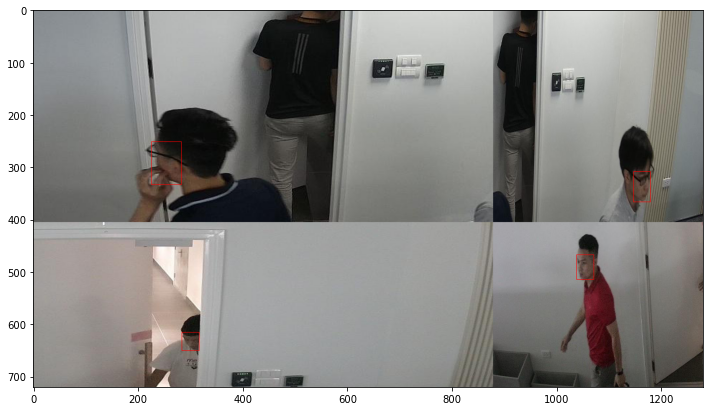

In [17]:
fig, ax = subplots(figsize=(12,8))
sca(ax)
imshow(sample_mosaic)

In [18]:
fig_close('all')

In [21]:
data_dir = 'dataset/base'
# labels_files = !ls {data_dir}/labels
labels_files = get_aug_needed_images(f'{data_dir}/labels')
save_dir = 'dataset/mosaic'

/tmp/ipykernel_3616/3635902404.py:20: UserWarning: loadtxt: Empty input file: "dataset/base/labels/853.txt"
  image_info = np.loadtxt(f'{folder}/{file}',ndmin=2)


In [22]:
len(labels_files)

85

In [23]:
for i in range(800,1200):
    fname_samples = np.random.choice(labels_files, 4, False)
    ls_images = [imread(f"{data_dir}/images/{fname.replace('txt','jpg')}")
                for fname in fname_samples]
    ls_info = [np.loadtxt(f"{data_dir}/labels/{fname}", ndmin=2) for fname in fname_samples]
    
    mosaic_img, mosaic_info = mosaic_augment(ls_images, ls_info)
    imsave(f"{save_dir}/images/mosaic_{i}.jpg", mosaic_img)
    np.savetxt(f"{save_dir}/labels/mosaic_{i}.txt", mosaic_info, fmt='%u %f %f %f %f')

In [20]:
np.random.shuffle(labels_files)
ls_images = [imread(f"{data_dir}/images/{fname.replace('txt','jpg')}")
            for fname in labels_files[:3]]
ls_info = [np.loadtxt(f"{data_dir}/labels/{fname}", ndmin=2) for fname in labels_files[:3]]

for i, fname in enumerate(labels_files[3:]):
    # fname_jpg = fname.replace('txt','jpg')
    ls_images.append(imread(f"{data_dir}/images/{fname.replace('txt','jpg')}"))
    ls_info.append(np.loadtxt(f"{data_dir}/labels/{fname}", ndmin=2))
    
    mosaic_img, mosaic_info = mosaic_augment(ls_images, ls_info)
    imsave(f"{save_dir}/images/mosaic_{i}.jpg", mosaic_img)
    np.savetxt(f"{save_dir}/labels/mosaic_{i}.txt", mosaic_info, fmt='%u %f %f %f %f')
    
    ls_images.pop(0)
    ls_info.pop(0)

In [24]:
data_dir = 'dataset/mosaic'
labels_files = os.listdir(f"{data_dir}/labels/")

for file in labels_files:
    file_jpg = file.replace('txt','jpg')
    image = imread(f"{data_dir}/images/{file_jpg}")
    arr = np.loadtxt(f"{data_dir}/labels/{file}", ndmin=2)
    for info in arr:
        info[[1,3]] *= image.shape[1]
        info[[2,4]] *= image.shape[0]

        top_left = np.around(info[[1,2]] - info[[3,4]]/2).astype(np.uint16, copy=False)
        bottom_right = np.around(info[[1,2]] + info[[3,4]]/2).astype(np.uint16, copy=False)

        image = rectangle(image, pt1=top_left, pt2=bottom_right,
                          color=label_colors[int(info[0])])
        
    imsave(f"{data_dir}/bounding_box/{file_jpg}", image)

---

In [8]:
ls_images = os.listdir('../FinalDataset/images/val')
len(ls_images)

272

In [6]:
file

'equalhist_1_836.jpg'

In [9]:
for file in ls_images:
    image = imread(f'../FinalDataset/images/val/{file}')
    imsave(f'../FinalDataset/images/resave/val/{file}', image)